<a href="https://colab.research.google.com/github/karolinakuligowska/TMSMM_codes/blob/main/TMSMM_11_Word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-learn

In [4]:
import sklearn

In [ ]:
# Word embeddings

In [6]:
# one-hot encoding

from sklearn.feature_extraction.text import CountVectorizer

# create a CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
          'Text of our first sentence.',
          'Text of the second sentence that appears to be longer.',
          'Sentence number three.',
          'This is the sentence number four.',
]


In [8]:
# learn the vocabulary and store CountVectorizer sparse matrix in X
X = vectorizer.fit_transform(corpus)

# retrieve feature names
print(vectorizer.get_feature_names_out())

# retrieving the matrix in the numpy form
print(X.toarray())

# transforming a new document according to learn vocabulary
vectorizer.transform(['Our new sentence']).toarray()

['appears' 'be' 'first' 'four' 'is' 'longer' 'number' 'of' 'our' 'second'
 'sentence' 'text' 'that' 'the' 'this' 'three' 'to']
[[0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0]]


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]])

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
# create tf-idf object

transformer = TfidfTransformer(smooth_idf=False)

# X can be obtained as X.toarray() from the previous snippet
X = [[3, 0, 1],
     [5, 0, 0],
     [3, 0, 0],
     [1, 0, 0],
     [3, 2, 0],
     [3, 0, 4]]

# learn the vocabulary and store tf-idf sparse matrix in tfidf
tfidf = transformer.fit_transform(X)

# retrieving matrix in numpy form as we did it before
tfidf.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.33653362, 0.        , 0.94167145]])

In [11]:
import gensim

In [13]:
# Word2Vec

from gensim.models import word2vec
corpus = [
          'Text of our first sentence.',
          'Text of the second sentence that appears to be longer.',
          'Sentence number three.',
          'This is the sentence number four.',
]
# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in corpus]
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)



In [22]:
print(model)



Word2Vec<vocab=19, vector_size=100, alpha=0.025>


In [20]:
print(model.wv['sentence'])

[-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193   0.00583312
  0.00119818  0.00210273 -0.00411039  0.00722533 -0.00630704  0.00464722
 -0.00821997  0.00203647 -0.00497705 -0.00424769 -0.00310898  0.00565521
  0.0057984  -0.00497465  0.00077333 -0.00849578  0.00780981  0.00925729
 -0.00274233  0.00080022  0.00074665  0.00547788 -0.00860608  0.00058446
  0.00686942  0.00223159  0.00112468 -0.00932216  0.00848237 -0.00626413
 -0.00299237  0.00349379 -0.00077263  0.00141129  0.00178199 -0.0068289
 -0.00972481  0.00904058  0.00619805 -0.00691293  0.00340348  0.00020606
  0.00475375 -0.00711994  0.00402695  0.00434743  0.00995737 -0.00447374
 -0.00138926 -0.00731732 -0.00969783 -0.00908026 -0.00102275 -0.00650329
  0.00484973 -0.00616403  0.00251919  0.00073944 -0.00339215 -0.00097922
  0.00997913  0.00914589 -0.00446183  0.00908303 -0.00564176  0.00593092
 -0.00309722  0.00343175  0.00301723  0.00690046 -0.00237388  0.00877504
  0.00758943 -0.00954765 -0.00800821 -0.0076379   0.

In [33]:
vocab = model.wv.key_to_index.keys()
# Iterate through the vocabulary using the updated method

words = list(vocab)


In [34]:
print(words)

['Text', 'of', 'number', 'the', 'sentence', 'that', 'our', 'first', 'sentence.', 'second', 'four.', 'is', 'to', 'be', 'longer.', 'Sentence', 'three.', 'This', 'appears']


In [36]:
# some visualization
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [39]:
# Fit a 2D PCA model to the vectors
Y = model.wv[model.wv.key_to_index.keys()]
pca = PCA(n_components=2)
result = pca.fit_transform(Y)


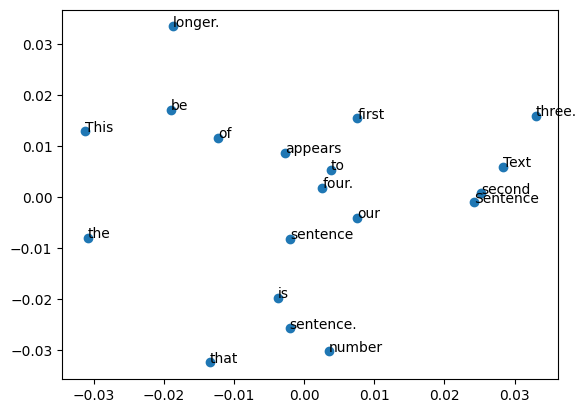

In [40]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Another Word2Vec example

In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
# another Word2Vec example

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec

#  Reads the txt file
sample = open("TMSMM_class2_MLK_speech.txt", "r")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

In [ ]:
# Create CBOW model
# window (default 5): the default size is 5, because we consider two words before and two words after the input word, in addition to the input word itself
# size (default 100): we wish to create word vectors of size 100 each; the number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word)
# min_count (default 5): the minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored
# workers: (default 3): the number of threads to use while training
# sg (default 0 or CBOW): the training algorithm, either CBOW (0) or skip gram (1)



In [48]:
model1 = gensim.models.Word2Vec(data, min_count = 1, window = 5)



In [51]:
# Print results
print("Cosine similarity between 'dream' " +
               "and 'freedom' - CBOW : ",
    model1.wv.similarity('dream', 'freedom'))

print("Cosine similarity between 'dream' " +
                 "and 'justice' - CBOW : ",
      model1.wv.similarity('dream', 'justice'))



Cosine similarity between 'dream' and 'freedom' - CBOW :  0.01430588
Cosine similarity between 'dream' and 'justice' - CBOW :  0.007834996


In [55]:
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, window = 5, sg = 1)

# Print results
print("Cosine similarity between 'dream' " +
          "and 'freedom' - Skip Gram : ",
    model2.wv.similarity('dream', 'freedom'))

print("Cosine similarity between 'dream' " +
            "and 'justice' - Skip Gram : ",
      model2.wv.similarity('dream', 'justice'))

Cosine similarity between 'dream' and 'freedom' - Skip Gram :  0.12075197
Cosine similarity between 'dream' and 'justice' - Skip Gram :  0.033765268


In [ ]:
# consider loading Google’s Word2Vec Embedding [Brownlee]
# download the .bin file listed below to run the code
# https://code.google.com/archive/p/word2vec/

from gensim.models import KeyedVectors
# load the google word2vec model
# 1,5 GB
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
# it is queen!

In [59]:
# consider Stanford’s GloVe Embedding
# download the .txt file listed below to run the code
# https://nlp.stanford.edu/projects/glove/

from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)



(17117, 100)

In [60]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model


In [61]:
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
# it is queen!

[('queen', 0.7698540687561035)]
